In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [31]:
df_lagged_added_stats_sa199m2e = pd.read_csv('sa199m2e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa196m2e = pd.read_csv('sa196m2e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa196m1e = pd.read_csv('sa196m1e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa198m2e = pd.read_csv('sa198m2e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa196m3e = pd.read_csv('sa196m3e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa199m3e = pd.read_csv('sa199m3e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa199m1e = pd.read_csv('sa199m1e_new_lagged_added_stats.csv')
df_lagged_added_stats_sa78m1 = pd.read_csv('sa78m1_new_lagged_added_stats.csv')
df_lagged_added_stats_sa78m3 = pd.read_csv('sa78m3_new_lagged_added_stats.csv')
df_lagged_added_stats_sa78m5 = pd.read_csv('sa78m5_new_lagged_added_stats.csv')

In [32]:
grouped_lagged_added_stats = pd.concat([df_lagged_added_stats_sa199m2e,df_lagged_added_stats_sa196m2e,
df_lagged_added_stats_sa196m1e,df_lagged_added_stats_sa198m2e,df_lagged_added_stats_sa196m3e,df_lagged_added_stats_sa199m3e,
df_lagged_added_stats_sa199m1e,df_lagged_added_stats_sa78m1,df_lagged_added_stats_sa78m3,df_lagged_added_stats_sa78m5]).iloc[:,1:]

# graphs

In [35]:
grouped_lagged_added_stats.columns[150:]

Index(['Lagged 3 Cur Coeff Time Proportional',
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       'Lagged 4 Cur Coeff Time Proportional',
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop', 'Turn', 'lagged_1_turn_ago',
       'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago',
       '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3

# classifier functions

In [73]:
'''
function to get indexes for all feature_importances_ from gradientboosting
'''
def get_indexed(feature_importances):
    #create pandas df, indexed
    #sort
    fi = {'Feature Importances': feature_importances}
    df_fi =pd.DataFrame(fi);
    df_fi_ranked = df_fi.sort_values(by='Feature Importances', ascending=False)
    return df_fi, df_fi_ranked;

In [88]:
'''
function to print column name along with fi
for x rows
'''
def get_column_rank(df_fi_ranked, column_names, x):
    rc = []
    fi = []
    for i in range(0,x):
        ti = df_fi_ranked.index[i]
        rc.append(column_names[ti])
        fi.append(df_fi_ranked['Feature Importances'][i])
    cr = {'Feature':rc, 'Feature Importances':fi}
    df_cr = pd.DataFrame(cr)
    return df_cr



In [ ]:
'''
function to create gradientboostingclassifier with all but specified dropped features

'''
def drop_features(maix, mainy, featureout):
    xnew = mainx.drop(columns = [featureout]);
    ynew = mainy

    





# gradient boosting

In [92]:
x_main = grouped_lagged_added_stats.iloc[:,:][grouped_lagged_added_stats['Choice Output'] > 1].drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', '2_cur_arm_duration',
       '3_cur_arm_duration', '4_cur_arm_duration', '5_cur_arm_duration','mean_2_cur_arm_duration', 'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
        'mean_5_cur_arm_duration','Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity', 'lagged_1_lagged_1_cur_coeff',
        'lagged_2_lagged_1_cur_coeff', 
        'lagged_3_lagged_1_cur_coeff','lagged_4_lagged_1_cur_coeff','lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff', 
        'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff','lagged_1_lagged_3_cur_coeff','lagged_2_lagged_3_cur_coeff', 
        'lagged_3_lagged_3_cur_coeff','lagged_4_lagged_3_cur_coeff','lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
        'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff','lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_past_arm_duration', '3_past_arm_duration', '4_past_arm_duration','2_past_mid_duration',
       '3_past_mid_duration', '4_past_mid_duration', '5_past_mid_duration', '2_past_exitmid_duration', '3_past_exitmid_duration',
       '4_past_exitmid_duration', '5_past_exitmid_duration','2_past_midentry_duration', '3_past_midentry_duration',
       '4_past_midentry_duration', '5_past_midentry_duration','2_past_exitmidentry_duration', '3_past_exitmidentry_duration',
       '4_past_exitmidentry_duration', '5_past_exitmidentry_duration',  'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago'])

In [93]:
x_names_columns = x_main.columns

In [198]:
x_main

,lagged_1_duration,lagged_2_duration,lagged_3_duration,lagged_4_duration,Entry Latency,lagged_1_entry_lat,lagged_2_entry_lat,lagged_3_entry_lat,lagged_4_entry_lat,lagged_1_exit_lat,...,mean_4_past_exitmid_duration,mean_5_past_exitmid_duration,mean_2_past_midentry_duration,mean_3_past_midentry_duration,mean_4_past_midentry_duration,mean_5_past_midentry_duration,mean_2_past_exitmidentry_duration,mean_3_past_exitmidentry_duration,mean_4_past_exitmidentry_duration,mean_5_past_exitmidentry_duration
0,0.208219,0.205479,0.336986,0.367123,0.281250,0.406250,0.406250,0.500000,0.000000,0.125000,...,0.506757,0.405405,0.442529,0.475096,0.451149,0.360920,0.489796,0.530612,0.522959,0.418367
1,0.210959,0.208219,0.205479,0.336986,0.312500,0.281250,0.406250,0.406250,0.500000,0.187500,...,0.513514,0.497297,0.413793,0.429119,0.456897,0.441379,0.464286,0.479592,0.512755,0.510204
2,0.142466,0.210959,0.208219,0.205479,0.500000,0.312500,0.281250,0.406250,0.406250,0.125000,...,0.486486,0.513514,0.465517,0.452107,0.454023,0.471264,0.510204,0.496599,0.500000,0.522449
3,0.197260,0.142466,0.210959,0.208219,0.468750,0.500000,0.312500,0.281250,0.406250,0.250000,...,0.476351,0.478378,0.482759,0.455939,0.448276,0.450575,0.530612,0.506803,0.497449,0.500000
4,0.178082,0.197260,0.142466,0.210959,0.968750,0.468750,0.500000,0.312500,0.281250,0.250000,...,0.520270,0.513514,0.620690,0.590038,0.543103,0.519540,0.663265,0.629252,0.586735,0.563265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.000000,0.416096,0.558219,0.029110,0.231884,0.144928,0.173913,0.115942,0.376812,0.041667,...,0.111821,0.264537,0.126736,0.121528,0.111111,0.257639,0.146724,0.140551,0.135328,0.279772
23,0.619863,1.000000,0.416096,0.558219,0.376812,0.231884,0.144928,0.173913,0.115942,0.097222,...,0.122204,0.118850,0.157986,0.148148,0.138889,0.127083,0.175214,0.167142,0.157407,0.149858
24,0.095890,0.619863,1.000000,0.416096,0.289855,0.376812,0.231884,0.144928,0.173913,0.402778,...,0.170927,0.157188,0.223958,0.190972,0.175347,0.162500,0.266382,0.225071,0.206553,0.190883
25,0.285959,0.095890,0.619863,1.000000,0.130435,0.289855,0.376812,0.231884,0.144928,1.000000,...,0.248403,0.225559,0.243056,0.225694,0.200521,0.186111,0.374644,0.319088,0.274929,0.250142


In [95]:
x_ = x_main.values

In [97]:
y_ = grouped_lagged_added_stats[grouped_lagged_added_stats['Choice Output']>1]['Choice Output'].values

In [98]:
y_.size

319

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=50)

In [163]:
mod = GradientBoostingClassifier(n_estimators = 100, max_depth=4, learning_rate=0.05)
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

In [164]:
target_names = ['2', '3', '4', '5']

In [165]:
f1_sc = f1_score(y_test, y_pred, average = 'weighted')

In [166]:
p_sc = precision_score(y_test, y_pred, average = 'weighted')

In [167]:
f1_sc

0.620059083358502

In [168]:
p_sc

0.6411830357142858

In [169]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [170]:
cf_matrix

array([[14,  0,  3,  0],
       [ 0, 14,  5,  0],
       [ 3, 10, 10,  0],
       [ 0,  0,  3,  2]], dtype=int64)

In [171]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           2       0.82      0.82      0.82        17
           3       0.58      0.74      0.65        19
           4       0.48      0.43      0.45        23
           5       1.00      0.40      0.57         5

    accuracy                           0.62        64
   macro avg       0.72      0.60      0.63        64
weighted avg       0.64      0.62      0.62        64



<Axes: >

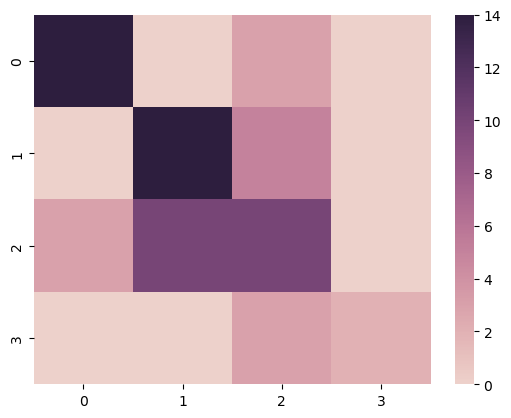

In [172]:
sns.heatmap(data = cf_matrix, cmap=sns.cubehelix_palette(as_cmap=True))

In [173]:
unsorted_features = mod.feature_importances_

In [174]:
fi, fi_ranked  = get_indexed(unsorted_features)

In [196]:
get_column_rank(fi_ranked, x_names_columns, 20)

,Feature,Feature Importances
0,Lagged 2 Cur Coeff,0.004222
1,Lagged 1 Cur Coeff,0.003785
2,Lagged 2 Cur Coeff Time Proportional,0.004547
3,Lagged 3 Cur Coeff,0.001684
4,lagged_3_current_coeff,0.003321
5,mean_2_past_exitmid_duration,0.004251
6,Lagged 1 Cur Coeff Time Proportional,0.011386
7,Current Coeff,0.000750
8,lagged_1_arm_tail_mov,0.003859
9,lagged_2_current_coeff_time_prop,0.007224


In [176]:
from sklearn.inspection import permutation_importance

In [227]:
r = permutation_importance(mod, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

In [226]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{x_names_columns[i]:<8}"
              f"{ r.importances_mean[i]:.3f}"
              f" +/- { r.importances_std[i]:.3f}")

Lagged 2 Cur Coeff0.155 +/- 0.040
Lagged 1 Cur Coeff0.120 +/- 0.030
lagged_2_current_coeff0.086 +/- 0.019
lagged_1_exit_lat0.017 +/- 0.006
lagged_3_arm_tail_vel0.017 +/- 0.008


In [228]:
for i in r.importances_mean.argsort()[::-1]:
        print(f"{x_names_columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Lagged 2 Cur Coeff0.155 +/- 0.040
Lagged 1 Cur Coeff0.120 +/- 0.030
lagged_2_current_coeff0.086 +/- 0.019
Lagged 1 Cur Coeff Time Proportional0.037 +/- 0.025
Lagged 2 Cur Coeff Time Proportional0.029 +/- 0.024
Lagged 3 Cur Coeff0.027 +/- 0.029
mean_3_past_exitmid_duration0.026 +/- 0.014
lagged_4_duration0.023 +/- 0.013
lagged_2_mid_nose_mov0.023 +/- 0.015
mean_5_past_midentry_duration0.021 +/- 0.023
lagged_1_exit_lat0.017 +/- 0.006
lagged_3_arm_tail_vel0.017 +/- 0.008
lagged_3_tail_max_distance0.012 +/- 0.010
Middle Nose Movement0.011 +/- 0.007
lagged_2_entry_lat0.011 +/- 0.007
mean_4_past_exitmid_duration0.011 +/- 0.007
mean_2_past_exitmidentry_duration0.011 +/- 0.007
MidEntry Duration0.010 +/- 0.007
lagged_2_exitmid_duration0.010 +/- 0.007
lagged_3_nose_max_distance0.010 +/- 0.019
lagged_3_duration0.008 +/- 0.008
Middle Tail Movement0.008 +/- 0.008
lagged_2_exit_lat0.007 +/- 0.008
lagged_3_mid_tail_mov0.007 +/- 0.008
lagged_4_tail_time_to_max_dist0.007 +/- 0.008
lagged_3_mid_nose_vel

In [ ]:
plt.xticks(ticks = df_sa196m1e_dc.index, labels = df_sa196m1e_dc['Arm Entry'])


In [237]:
def plot_permutation_importance(clf, X, y, col, ax):
    result = permutation_importance(clf, X, y, n_repeats=30, random_state=0, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
        #if parse_version(matplotlib.__version__) >= parse_version("3.9")
        #else "labels"
    )
    tick_labels_dict = {tick_labels_parameter_name: col.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False)
    ax.set_yticklabels(col.columns[perm_sorted_idx])
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

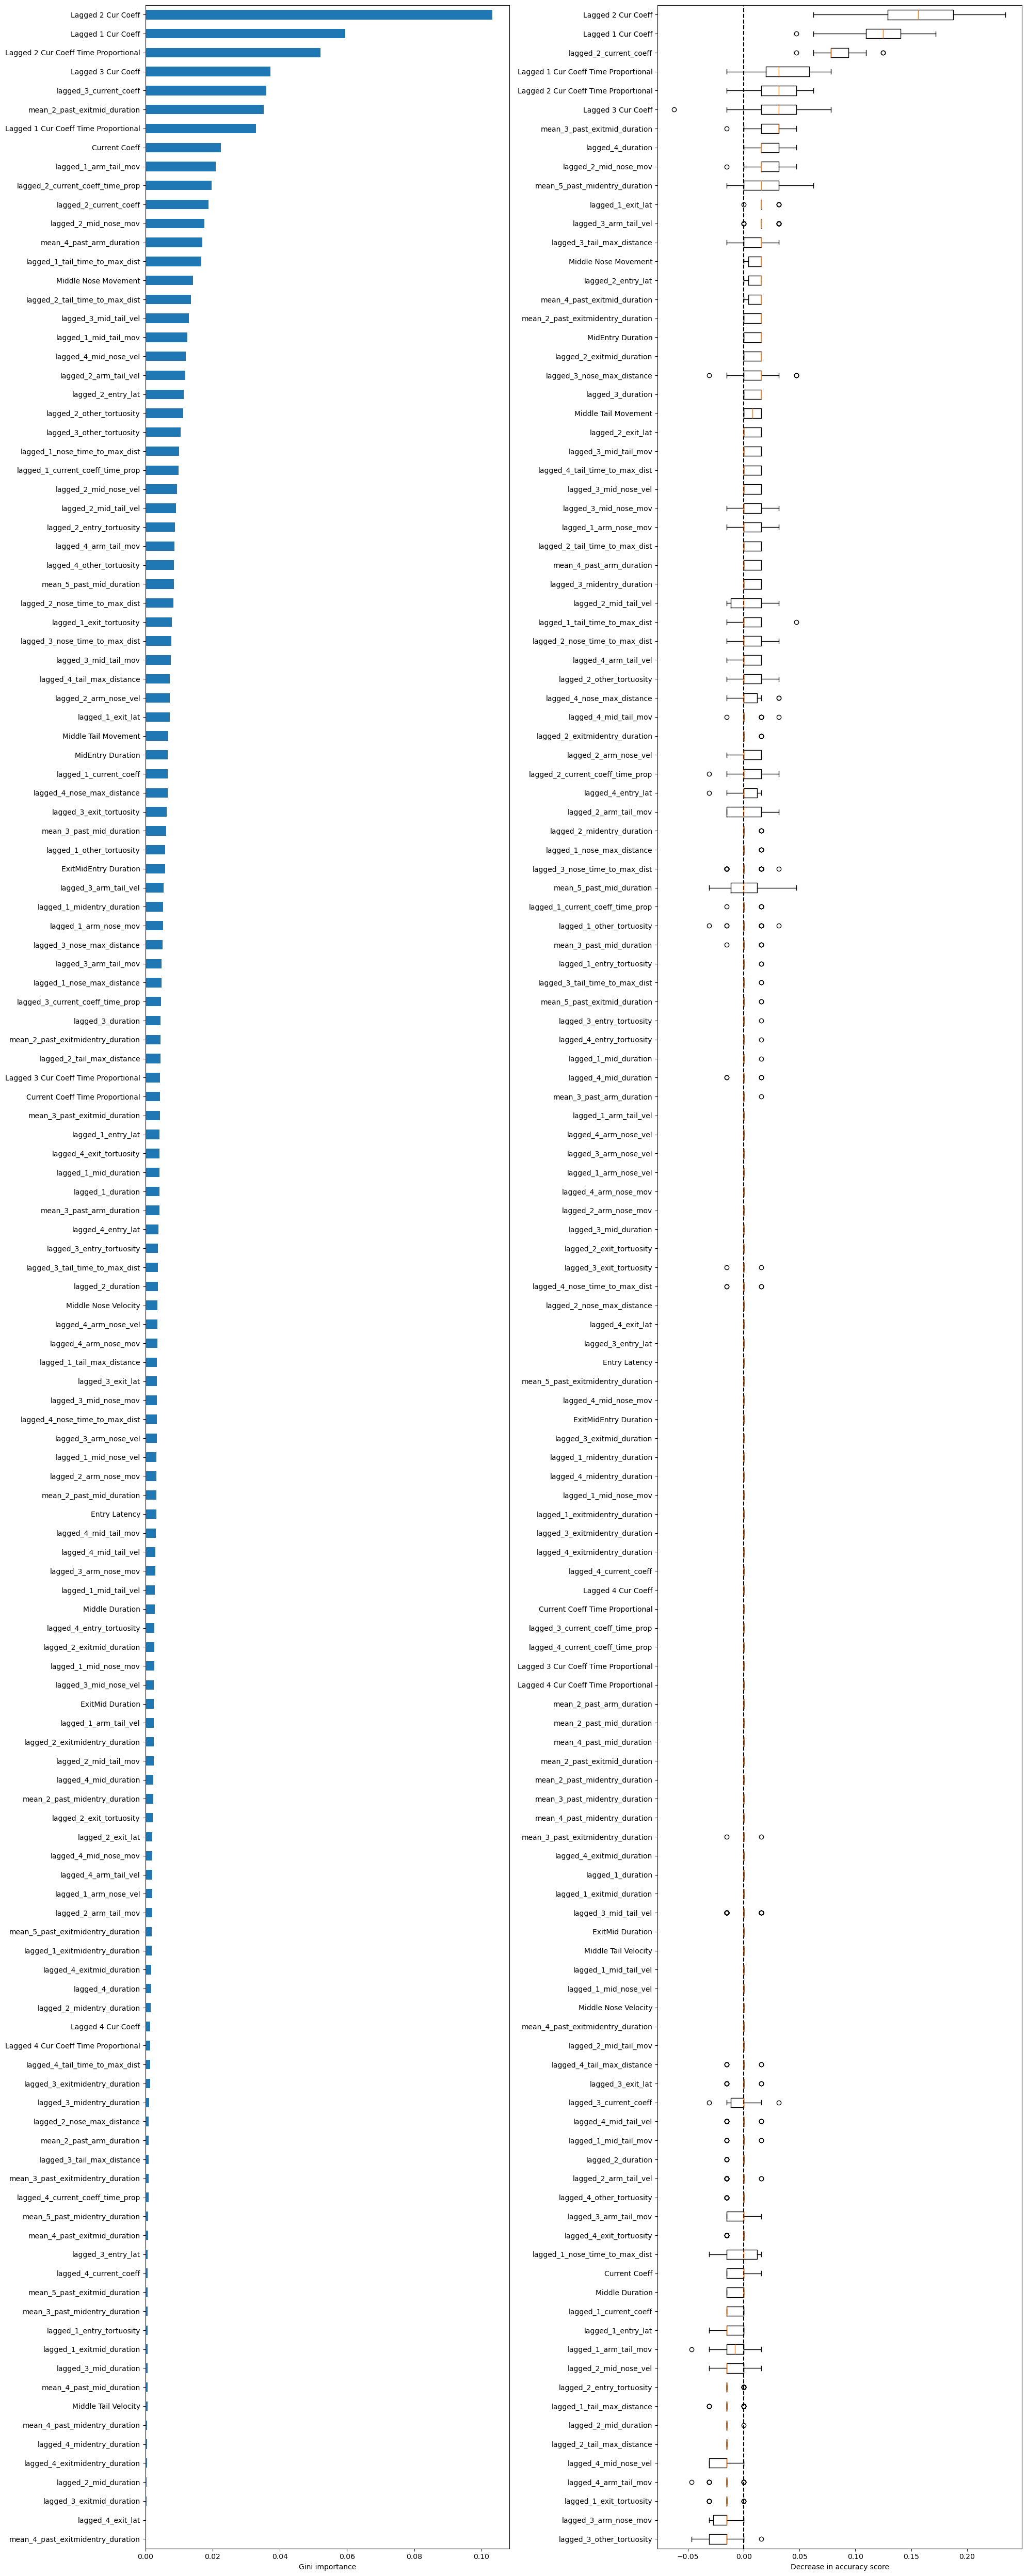

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(mod.feature_importances_, index=x_main.columns)
tree_importance_sorted_idx = np.argsort(mod.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod, X_test, y_test, x_main,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


plt.savefig('Impurity-based_vs_permutation importances.png')

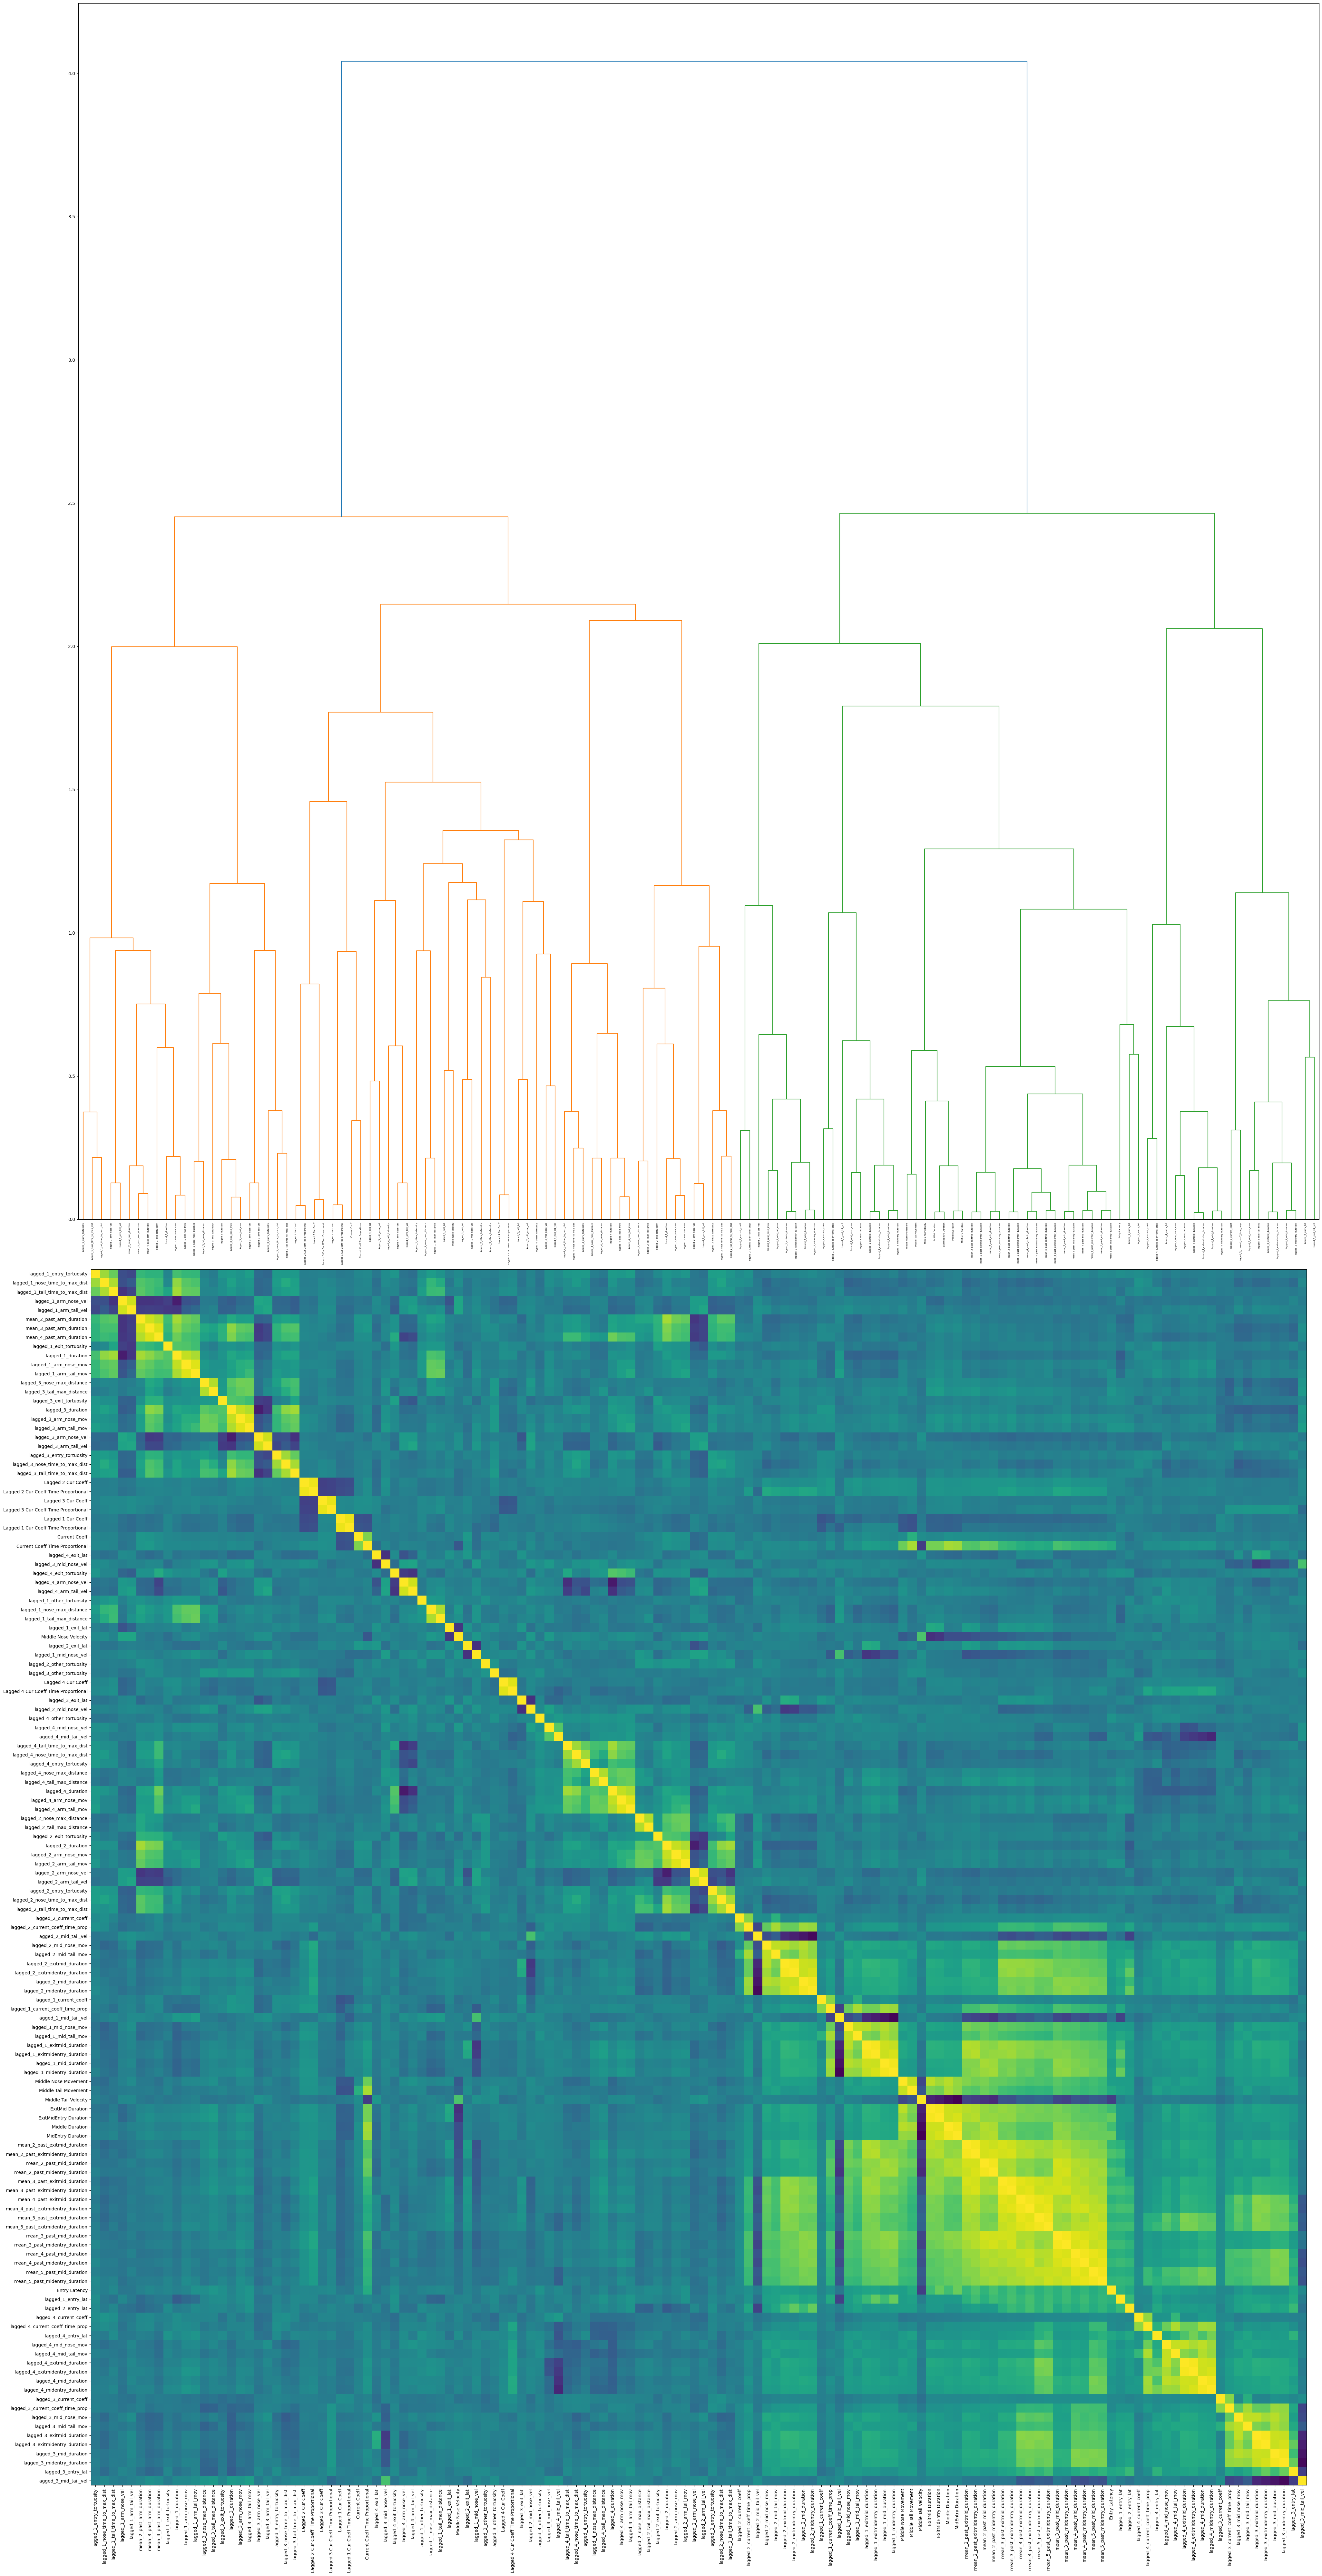

In [242]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(40, 80))
corr = spearmanr(x_main).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=x_main.columns.to_list(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()
plt.savefig('Hierarchical Clustering and Correlation Matrix.png')

In [245]:
ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])

In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [156]:
param_grid1 = {'n_estimators' : [100,120,150],
                'max_depth' : [4],
                #'min_samples_split' : [2, 4, 8],
                'learning_rate' : [0.05, 0.07, 0.1, 0.3, 0.5],
                #'min_samples_leaf' : [1,2,4,8],
                #'max_features' : [8, 16, 24, 32, 40, 48, 56, 60],
}

In [157]:
search = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid1, scoring ='f1_weighted', verbose = 4)

In [158]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=100;, score=0.442 total time=   5.7s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=100;, score=0.486 total time=   5.8s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=100;, score=0.546 total time=   5.7s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=100;, score=0.588 total time=   5.6s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=100;, score=0.488 total time=   5.7s
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=120;, score=0.409 total time=   6.8s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=120;, score=0.472 total time=   6.7s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=120;, score=0.571 total time=   6.8s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=120;, score=0.564 total time=   6.8s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=120;, score=0.47

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.07, 0.1, 0.3, 0.5],
                         'max_depth': [4], 'n_estimators': [100, 120, 150]},
             scoring='f1_weighted', verbose=4)

In [162]:
search.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=4)